In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("earthquake_alert_balanced_dataset.csv")
print(df.shape)
print(df.columns)



(1300, 6)
Index(['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'alert'], dtype='object')


### Q What is the distribution of earthquakes across different alert levels?
🎯**Purpose**: To understand how many events fall under each severity category (green, yellow, orange, red).


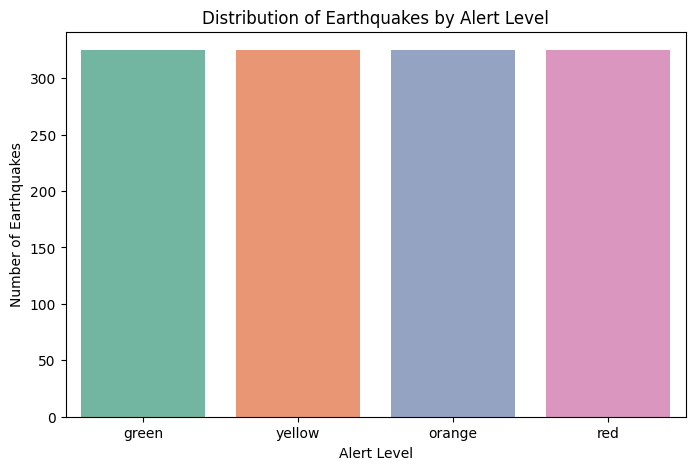

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x='alert', hue='alert', data=df, palette='Set2', legend=False)
plt.title("Distribution of Earthquakes by Alert Level")
plt.xlabel("Alert Level")
plt.ylabel("Number of Earthquakes")
plt.show()

### Q How does earthquake magnitude vary across alert levels?

🎯**Purpose**: To compare the intensity of earthquakes (magnitude) across different alert categories — green, yellow, orange, and red. This helps us understand whether higher alert levels are consistently associated with stronger earthquakes.



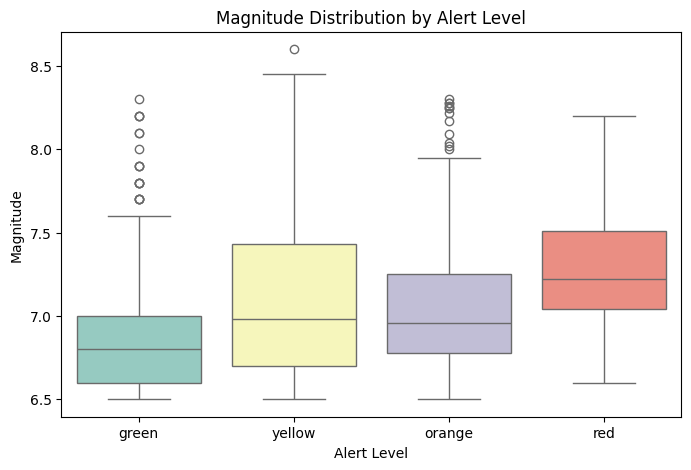

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x='alert', y='magnitude', hue='alert', data=df, palette='Set3', dodge=False, legend=False)
plt.title("Magnitude Distribution by Alert Level")
plt.xlabel("Alert Level")
plt.ylabel("Magnitude")
plt.show()

 ## Q: Is there a relationship between depth and magnitude of earthquakes?
 
🎯**Purpose**:To analyze whether deeper earthquakes tend to be stronger or weaker, and how they are distributed across alert levels.


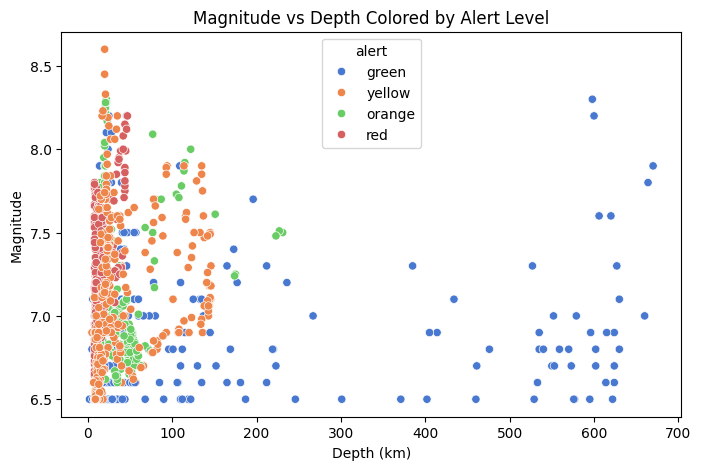

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='depth', y='magnitude', hue='alert', data=df, palette='muted')
plt.title("Magnitude vs Depth Colored by Alert Level")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()

 ### Q: Which alert level has the highest average significance score?
 
 🎯 **Purpose**:To identify which alert category (green, yellow, orange, red) is linked to the most impactful earthquakes based on the sig score

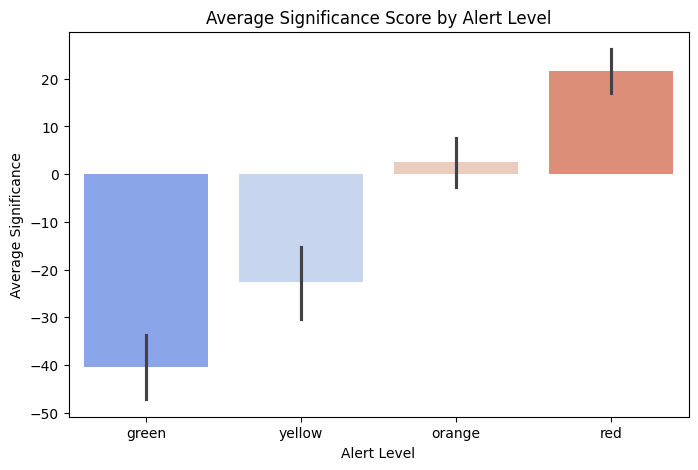

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(x='alert', y='sig', hue='alert', data=df, estimator='mean', palette='coolwarm', dodge=False, legend=False)
plt.title("Average Significance Score by Alert Level")
plt.xlabel("Alert Level")
plt.ylabel("Average Significance")
plt.show()

### Q: What are the top 10 earthquakes with the highest CDI (Community Internet Intensity)?

🎯 **Purpose**:To identify the most strongly felt earthquakes based on public reports (cdi score). Useful for understanding real-world impact.


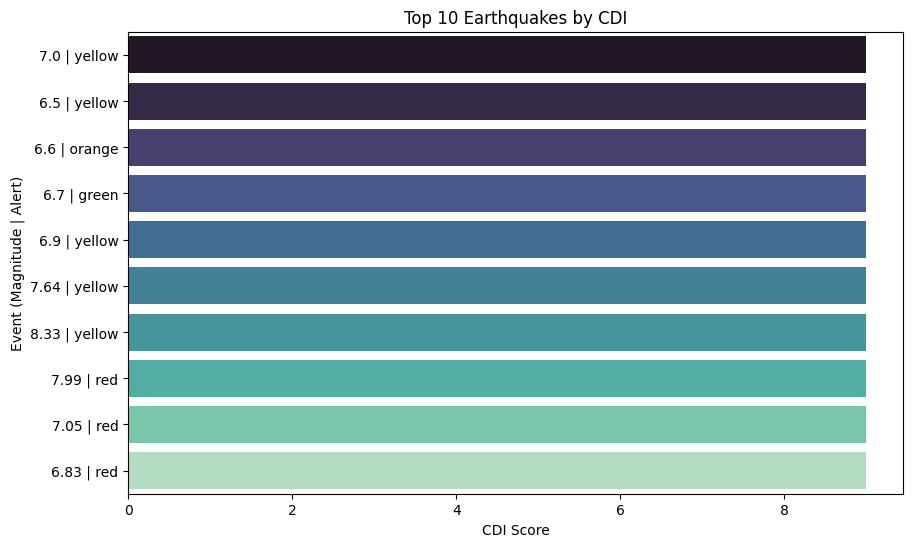

In [12]:
top_cdi = df.sort_values(by='cdi', ascending=False).head(10)

# Create a label column for y-axis
top_cdi['label'] = top_cdi['magnitude'].astype(str) + " | " + top_cdi['alert']

plt.figure(figsize=(10,6))
sns.barplot(x='cdi', y='label', hue='label', data=top_cdi, orient='h', palette='mako', legend=False)
plt.title("Top 10 Earthquakes by CDI")
plt.xlabel("CDI Score")
plt.ylabel("Event (Magnitude | Alert)")
plt.show()